In [1]:
from script.model_localization import pyramid, sliding_window, iou_bbox, non_maximum_supperssion, visualize_bbox
from script.model_classification import SVMObjectClassifier
from sklearn.model_selection import train_test_split
from script.dataset import load_vehicle_dataset
from script.feature_source import FeatureExtracter
from script.training import training_model
from script.slider import Slider
import numpy as np
import argparse
import time
import cv2
import os

In [3]:
sourcer_params = {             
  'spatial_size': (32, 32), # (16, 16), (32, 32), (64, 64)
  'orientations': 9,        # 6 - 12
  'pixels_per_cell': 8,     # 8, 16
  'cells_per_block': 2,     # 1, 2
  'transform_sqrt': True,
  'block_norm': 'L2',
  'hog_visualize': False
}
exist_path = './save_model/model.pkl'
save_path = './save_model'
feature_extracter = FeatureExtracter(**sourcer_params)

In [4]:
model = SVMObjectClassifier(C=0.5)
model.set_feature_extracter(feature_extracter)
if os.path.exists(save_path + '/model.pkl'):
    print('Loading model...')
    model.load(save_path)

Loading model...


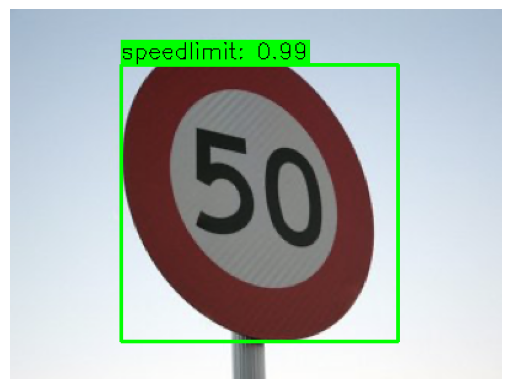

In [5]:
windowSize = [(50, 50), (80, 80), (100, 100), (150, 150), (200, 200)]
image_path = './dataset/traffic_sign_board/images/road103.png'
image = cv2.imread(image_path)
predict_bbox = []
for window_size in windowSize:
    slider = Slider(model, window_size, 20, scale=1.5, visualize=True)
    predict_bbox += slider.predict(image, 0.92)
predict_bbox = non_maximum_supperssion(predict_bbox, 0.2)
visualize_bbox(image, predict_bbox)